# Part 1 - importação

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv


In [ ]:

!pip install watermark

In [ ]:
import re
import unicodedata
import itertools
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt


from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split


import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


sns.set_theme(style='whitegrid')
palette='viridis'


import warnings
warnings.filterwarnings("ignore")


from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())


import watermark


%reload_ext watermark
%watermark -a "Library versions" --iversions

2024-08-15 18:59:42.242466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 18:59:42.242575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 18:59:42.379459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

keras     : 3.4.1
watermark : 2.4.3
matplotlib: 3.7.5
pandas    : 2.2.2
plotly    : 5.18.0
tensorflow: 2.15.0
numpy     : 1.26.4
re        : 2.2.1
seaborn   : 0.12.2



# Part 2 - Database

In [ ]:

pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
df

DateTime  Consumption  Production  Nuclear  Wind  \
0      2019-01-01 00:00:00         6352        6527     1395    79   
1      2019-01-01 01:00:00         6116        5701     1393    96   
2      2019-01-01 02:00:00         5873        5676     1393   142   
3      2019-01-01 03:00:00         5682        5603     1397   191   
4      2019-01-01 04:00:00         5557        5454     1393   159   
...                    ...          ...         ...      ...   ...   
46006  2024-03-31 19:00:00         5618        5902     1398   505   
46007  2024-03-31 20:00:00         6107        6205     1395   671   
46008  2024-03-31 21:00:00         5991        5855     1395   868   
46009  2024-03-31 22:00:00         5527        5726     1393   908   
46010  2024-03-31 23:00:00         5111        5551     1391  1011   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  
0               1383         1896  1744      0       30  
1               1112         1429  1641      0       30  
2               1030         1465  1616      0       30  
3                972         1455  1558      0       30  
4                960         1454  1458      0       30  
...              ...          ...   ...    ...      ...  
46006           2294         1012   620      6       65  
46007           2389         1037   645      0       66  
46008           2201          705   621      0       66  
46009           2088          648   622      0       66  
46010           1845          633   607      0       66  

[46011 rows x 10 columns]

In [ ]:

df.head()

DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0  2019-01-01 00:00:00         6352        6527     1395    79           1383   
1  2019-01-01 01:00:00         6116        5701     1393    96           1112   
2  2019-01-01 02:00:00         5873        5676     1393   142           1030   
3  2019-01-01 03:00:00         5682        5603     1397   191            972   
4  2019-01-01 04:00:00         5557        5454     1393   159            960   

   Oil and Gas  Coal  Solar  Biomass  
0         1896  1744      0       30  
1         1429  1641      0       30  
2         1465  1616      0       30  
3         1455  1558      0       30  
4         1454  1458      0       30

In [ ]:

df.tail()

DateTime  Consumption  Production  Nuclear  Wind  \
46006  2024-03-31 19:00:00         5618        5902     1398   505   
46007  2024-03-31 20:00:00         6107        6205     1395   671   
46008  2024-03-31 21:00:00         5991        5855     1395   868   
46009  2024-03-31 22:00:00         5527        5726     1393   908   
46010  2024-03-31 23:00:00         5111        5551     1391  1011   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  
46006           2294         1012   620      6       65  
46007           2389         1037   645      0       66  
46008           2201          705   621      0       66  
46009           2088          648   622      0       66  
46010           1845          633   607      0       66

In [ ]:

df.shape

(46011, 10)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [ ]:

df.dtypes

DateTime         object
Consumption       int64
Production        int64
Nuclear           int64
Wind              int64
Hydroelectric     int64
Oil and Gas       int64
Coal              int64
Solar             int64
Biomass           int64
dtype: object

# Part 3 - Análise exploratória de dados

In [ ]:
def create_time_features(df, datetime_col):
    """
Adiciona novos recursos baseados em tempo a um DataFrame com base em uma coluna datetime especificada.

Parâmetros:
df (pd.DataFrame): O DataFrame ao qual os recursos de tempo serão adicionados.
datetime_col (str): O nome da coluna no DataFrame que contém dados datetime.

Retorna:
pd.DataFrame: O DataFrame com novas colunas representando diferentes recursos de tempo derivados da coluna datetime.

Os seguintes recursos são adicionados ao DataFrame:
- 'hour': A hora do dia (0-23) extraída da coluna datetime.
- 'day_of_week': O dia da semana (0=segunda-feira, 6=domingo) extraído da coluna datetime.
- 'quarter': O trimestre do ano (1-4) extraído da coluna datetime.
- 'month': O mês do ano (1-12) extraído da coluna datetime.
- 'year': O ano extraído da coluna datetime.
- 'day_of_year': O dia do ano (1-365/366) extraído da coluna datetime.
    """
   
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    

    df['hour'] = df[datetime_col].dt.hour
    df['day_of_week'] = df[datetime_col].dt.dayofweek
    df['quarter'] = df[datetime_col].dt.quarter
    df['month'] = df[datetime_col].dt.month
    df['year'] = df[datetime_col].dt.year
    df['day_of_year'] = df[datetime_col].dt.dayofyear
    
    return df


df = create_time_features(df, 'DateTime')
df

DateTime  Consumption  Production  Nuclear  Wind  \
0     2019-01-01 00:00:00         6352        6527     1395    79   
1     2019-01-01 01:00:00         6116        5701     1393    96   
2     2019-01-01 02:00:00         5873        5676     1393   142   
3     2019-01-01 03:00:00         5682        5603     1397   191   
4     2019-01-01 04:00:00         5557        5454     1393   159   
...                   ...          ...         ...      ...   ...   
46006 2024-03-31 19:00:00         5618        5902     1398   505   
46007 2024-03-31 20:00:00         6107        6205     1395   671   
46008 2024-03-31 21:00:00         5991        5855     1395   868   
46009 2024-03-31 22:00:00         5527        5726     1393   908   
46010 2024-03-31 23:00:00         5111        5551     1391  1011   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  hour  day_of_week  \
0               1383         1896  1744      0       30     0            1   
1               1112         1429  1641      0       30     1            1   
2               1030         1465  1616      0       30     2            1   
3                972         1455  1558      0       30     3            1   
4                960         1454  1458      0       30     4            1   
...              ...          ...   ...    ...      ...   ...          ...   
46006           2294         1012   620      6       65    19            6   
46007           2389         1037   645      0       66    20            6   
46008           2201          705   621      0       66    21            6   
46009           2088          648   622      0       66    22            6   
46010           1845          633   607      0       66    23            6   

       quarter  month  year  day_of_year  
0            1      1  2019            1  
1            1      1  2019            1  
2            1      1  2019            1  
3            1      1  2019            1  
4            1      1  2019            1  
...        ...    ...   ...          ...  
46006        1      3  2024           91  
46007        1      3  2024           91  
46008        1      3  2024           91  
46009        1      3  2024           91  
46010        1      3  2024           91  

[46011 rows x 16 columns]

In [ ]:

df.describe().T

count                           mean                  min  \
DateTime         46011  2021-08-16 11:19:47.715981056  2019-01-01 00:00:00   
Consumption    46011.0                     6587.61644               3889.0   
Production     46011.0                    6518.645628               3315.0   
Nuclear        46011.0                    1291.177501                562.0   
Wind           46011.0                     792.310882                -26.0   
Hydroelectric  46011.0                    1857.052444                175.0   
Oil and Gas    46011.0                    1171.890418                198.0   
Coal           46011.0                    1193.157332                279.0   
Solar          46011.0                     156.688031                  0.0   
Biomass        46011.0                      55.851862                 17.0   
hour           46011.0                      11.499446                  0.0   
day_of_week    46011.0                        3.00176                  0.0   
quarter        46011.0                       2.437634                  1.0   
month          46011.0                       6.309969                  1.0   
year           46011.0                     2021.14177               2019.0   
day_of_year    46011.0                     176.628067                  1.0   

                               25%                  50%                  75%  \
DateTime       2020-04-24 06:30:00  2021-08-16 12:00:00  2022-12-08 15:30:00   
Consumption                 5773.0               6552.0               7321.0   
Production                  5814.0               6462.0               7176.0   
Nuclear                     1347.0               1383.0               1405.0   
Wind                         236.0                592.0               1205.0   
Hydroelectric               1347.0               1747.0               2265.0   
Oil and Gas                  858.0               1211.0               1511.0   
Coal                         962.0               1172.0               1406.0   
Solar                          0.0                  2.0                280.0   
Biomass                       45.0                 57.0                 67.0   
hour                           5.0                 11.0                 17.0   
day_of_week                    1.0                  3.0                  5.0   
quarter                        1.0                  2.0                  3.0   
month                          3.0                  6.0                  9.0   
year                        2020.0               2021.0               2022.0   
day_of_year                   80.0                174.0                270.0   

                               max          std  
DateTime       2024-03-31 23:00:00          NaN  
Consumption                 9615.0  1043.654923  
Production                  9886.0   986.805018  
Nuclear                     1457.0   236.549637  
Wind                        2811.0   675.812712  
Hydroelectric               4434.0   692.592157  
Oil and Gas                 2141.0   434.748917  
Coal                        2537.0   320.449368  
Solar                       1137.0    229.50265  
Biomass                       89.0    14.235554  
hour                          23.0     6.922376  
day_of_week                    6.0      1.99945  
quarter                        4.0     1.136479  
month                         12.0     3.505159  
year                        2024.0     1.520363  
day_of_year                  366.0   107.102077

- **2. Análise Temporal - Visualização de Tendências Temporais**

Analise como as variáveis ​​de Consumo e Produção evoluem ao longo do tempo

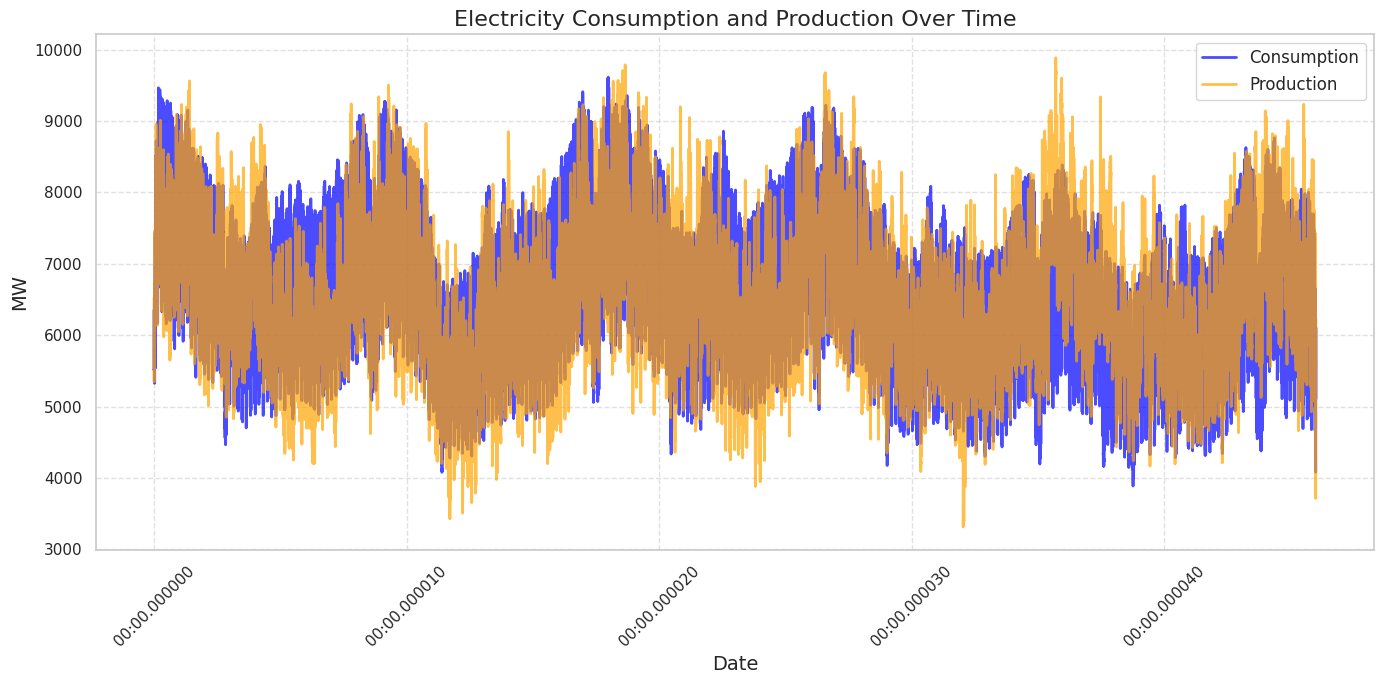

In [ ]:

df.index = pd.to_datetime(df.index)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Consumption'], label='Consumption', color='blue', alpha=0.7, linewidth=2)
plt.plot(df.index, df['Production'], label='Production', color='orange', alpha=0.7, linewidth=2)
plt.title('Electricity Consumption and Production Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MW', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(False, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

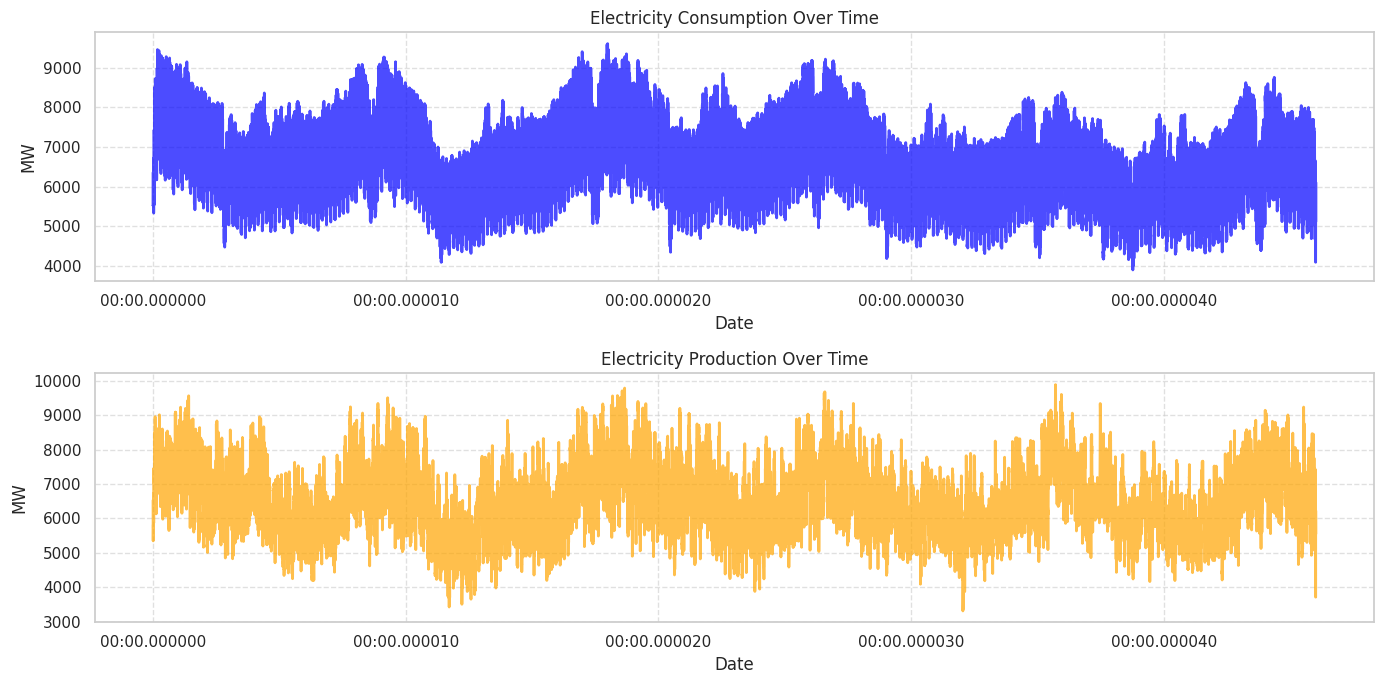

In [ ]:

df.index = pd.to_datetime(df.index)


plt.figure(figsize=(14, 7))


plt.subplot(2, 1, 1)
plt.plot(df.index, df['Consumption'], label='Consumption', color='blue', alpha=0.7, linewidth=2)
plt.title('Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.grid(False, linestyle='--', alpha=0.6)

# Plot Production
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Production'], label='Production', color='orange', alpha=0.7, linewidth=2)
plt.title('Electricity Production Over Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.grid(False, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- **2.1 Sazonalidade e Ciclos**

Identifique padrões sazonais, como variações diárias, semanais ou sazonais.

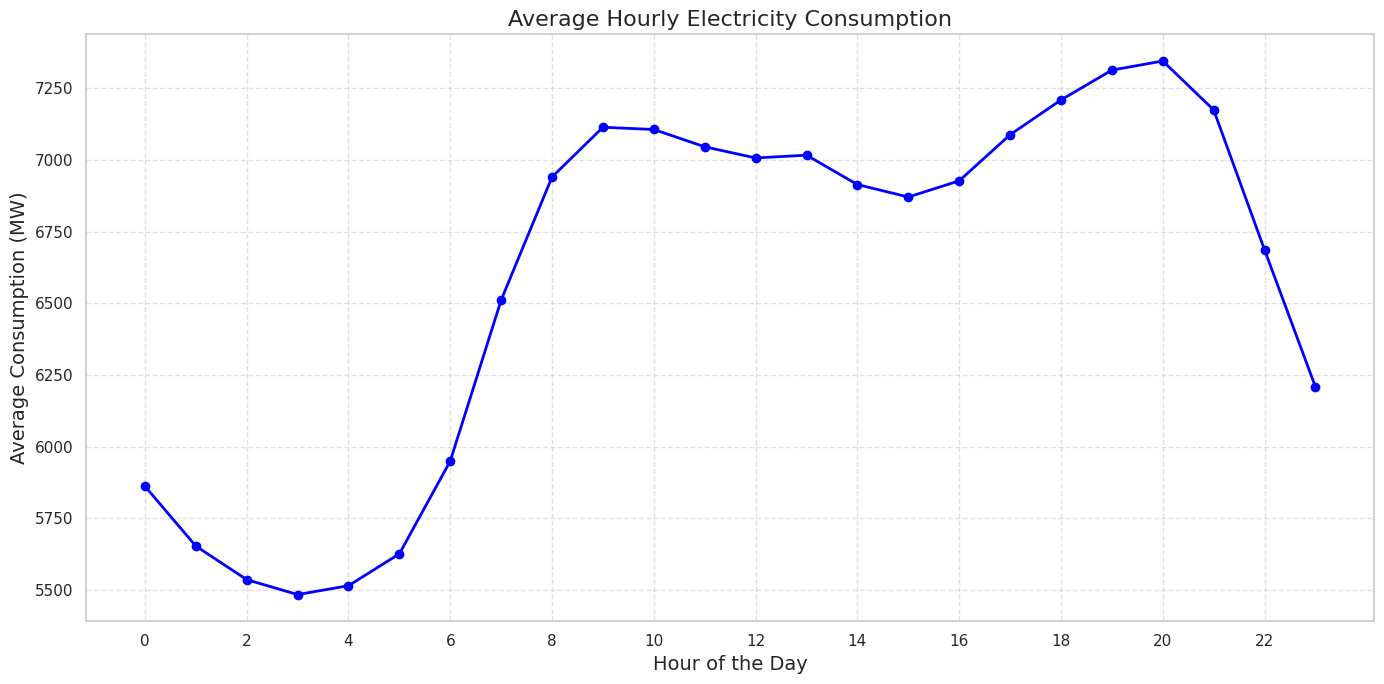

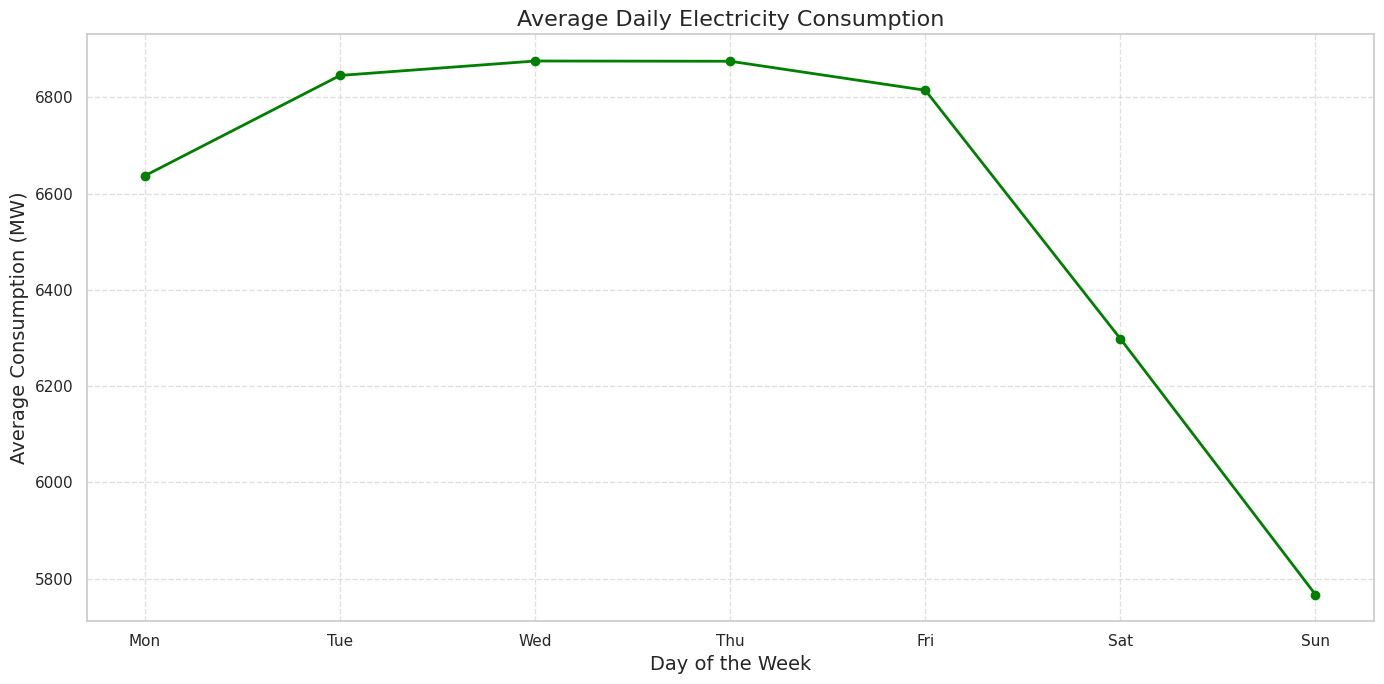

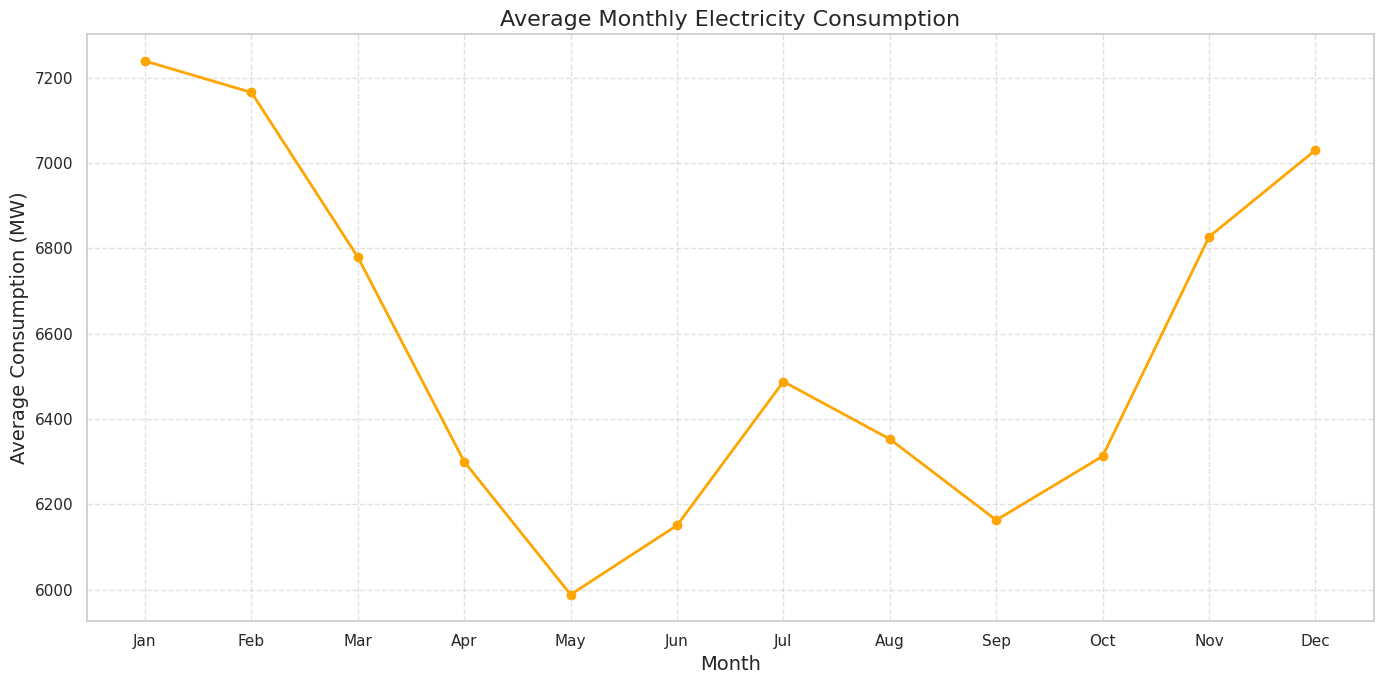

In [ ]:

plt.figure(figsize=(14, 7))
df.groupby('hour')['Consumption'].mean().plot(color='blue', linewidth=2, marker='o')
plt.title('Average Hourly Electricity Consumption', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Consumption (MW)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))
df.groupby('day_of_week')['Consumption'].mean().plot(color='green', linewidth=2, marker='o')
plt.title('Average Daily Electricity Consumption', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Consumption (MW)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))
df.groupby('month')['Consumption'].mean().plot(color='orange', linewidth=2, marker='o')
plt.title('Average Monthly Electricity Consumption', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Consumption (MW)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

**3. Análise de Correlação**

- Correlação entre Variáveis
- Analisar a correlação entre as diferentes fontes de produção e consumo de energia.

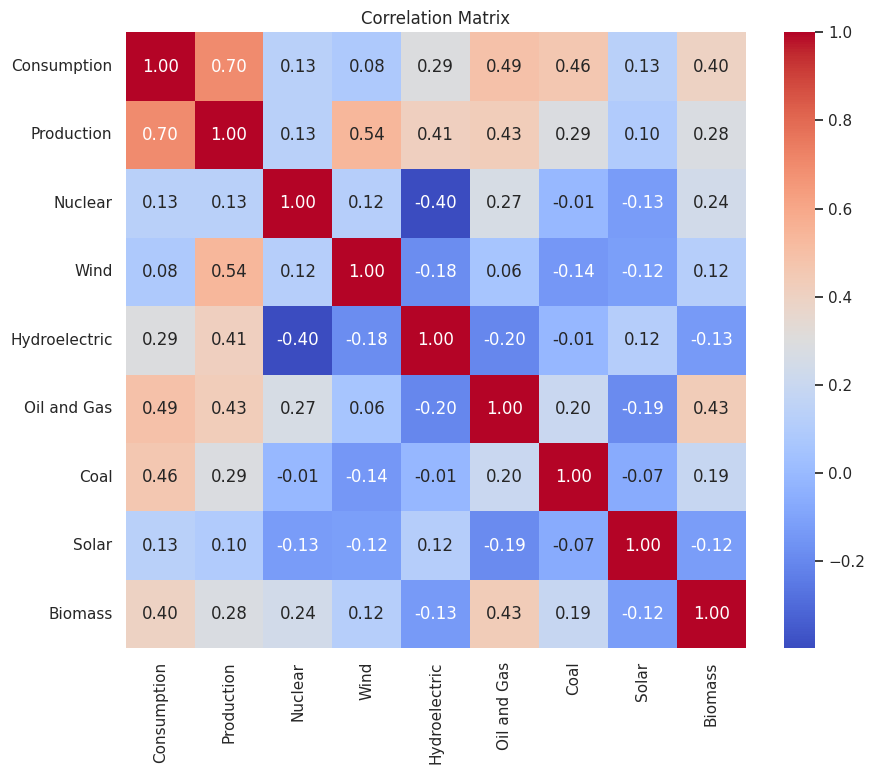

In [15]:
corr_matrix = df[['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- **Consumo vs. Produção**: A correlação positiva é de 0,70, indicando uma forte relação entre consumo de eletricidade e produção.

- **Consumo vs. Petróleo e Gás**: A correlação positiva é de 0,46, sugerindo uma relação moderada entre consumo de eletricidade e produção de petróleo e gás.

- **Produção vs. Eólica**: A correlação positiva é de 0,54, destacando uma relação moderada entre produção geral de eletricidade e geração de energia eólica.

- **Petróleo e Gás vs. Consumo**: A correlação positiva é de 0,49, mostrando uma associação moderada entre produção de petróleo e gás e consumo de eletricidade.

- **Biomassa vs. Petróleo e Gás**: A correlação positiva é de 0,43, indicando uma relação moderada entre biomassa e produção de petróleo e gás.

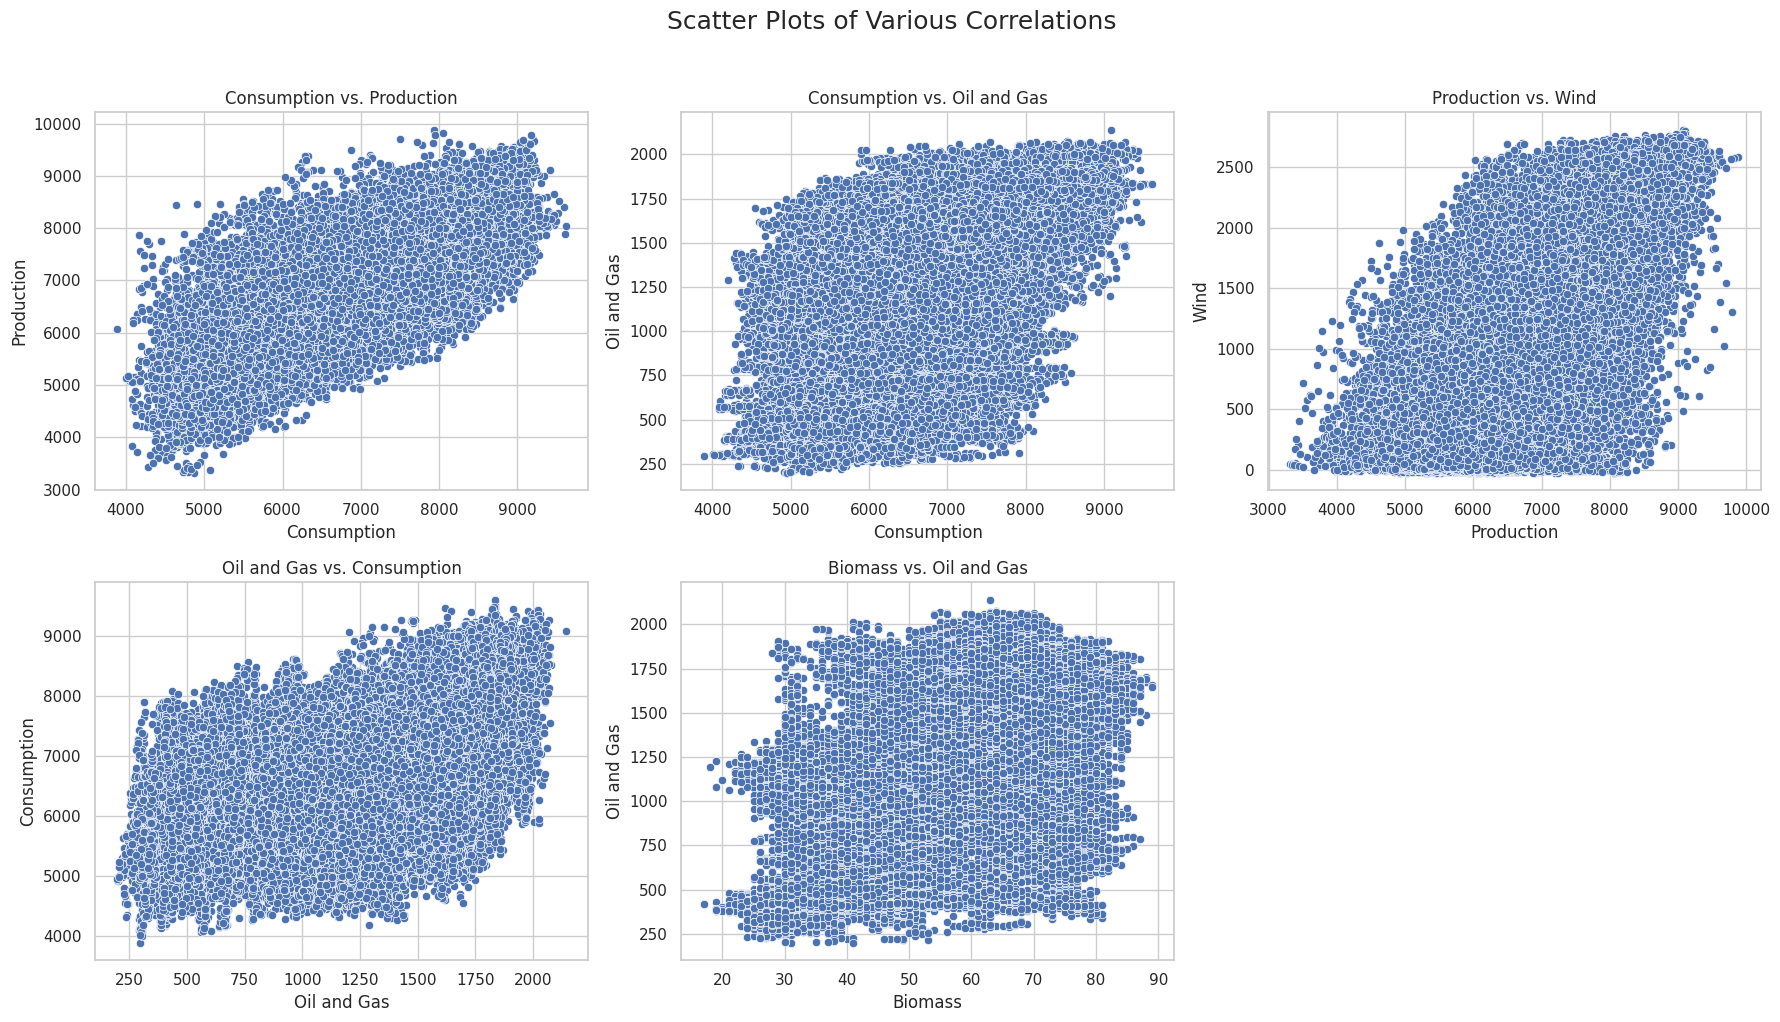

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0, 0], x="Consumption", y="Production", data=df)
axes[0, 0].set_title('Consumption vs. Production')

sns.scatterplot(ax=axes[0, 1], x="Consumption", y="Oil and Gas", data=df)
axes[0, 1].set_title('Consumption vs. Oil and Gas')

sns.scatterplot(ax=axes[0, 2], x="Production", y="Wind", data=df)
axes[0, 2].set_title('Production vs. Wind')

sns.scatterplot(ax=axes[1, 0], x="Oil and Gas", y="Consumption", data=df)
axes[1, 0].set_title('Oil and Gas vs. Consumption')

sns.scatterplot(ax=axes[1, 1], x="Biomass", y="Oil and Gas", data=df)
axes[1, 1].set_title('Biomass vs. Oil and Gas')

fig.delaxes(axes[1, 2])

fig.suptitle('Scatter Plots of Various Correlations', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

### 1. **Consumo vs. Produção:**

- **Correlação:** 0,70

- **Análise:** O gráfico de dispersão mostra uma correlação positiva clara, indicando que, à medida que o consumo de eletricidade aumenta, a produção também tende a aumentar. Essa forte correlação é visualmente evidente pela tendência ascendente nos pontos de dados.

### 2. **Consumo vs. Petróleo e Gás:**

- **Correlação:** 0,46

- **Análise:** Há uma correlação positiva moderada entre o consumo de eletricidade e a produção de petróleo e gás. Os pontos de dados são mais dispersos em comparação ao gráfico Consumo vs. Produção, refletindo a correlação mais fraca.

### 3. **Produção vs. Vento:**

- **Correlação:** 0,54

- **Análise:** Este gráfico mostra uma correlação positiva moderada entre a produção total de eletricidade e a geração de energia eólica. A distribuição de pontos sugere que, embora a produção eólica contribua para a produção geral, ela não é o único determinante.

### 4. **Petróleo e gás vs. Consumo:**

- **Correlação:** 0,49

- **Análise:** Semelhante ao gráfico Consumo vs. Petróleo e gás, este gráfico mostra uma correlação positiva moderada. A relação entre produção de petróleo e gás e consumo é clara, mas não tão forte quanto a relação Consumo vs. Produção. Isso sugere que, embora a produção de petróleo e gás influencie o consumo, outros fatores também estão em jogo.

### 5. **Biomassa vs. Petróleo e gás:**

- **Correlação:** 0,43

- **Análise:** O gráfico de dispersão indica uma correlação positiva moderada entre produção de biomassa e produção de petróleo e gás. A dispersão dos pontos de dados é relativamente ampla, indicando que a produção de biomassa tende a aumentar junto com a produção de petróleo e gás, mas a relação não é particularmente forte.

### Observações gerais:

- **Densidade de pontos:** Na maioria dos gráficos de dispersão, especialmente aqueles envolvendo `Petróleo e gás`, os pontos são densamente compactados, o que pode dificultar a visualização de tendências individuais. Isso sugere que há algum ruído ou variabilidade nos dados, ou que vários fatores estão influenciando essas relações.

- **Força da correlação:** As correlações são positivas em todos os aspectos, mas variam em força. A relação mais forte é entre `Consumo` e `Produção`, o que é lógico, pois a produção geralmente precisa atender às demandas de consumo.

- **Tendências lineares:** A maioria dos gráficos sugere uma relação linear, mas o grau de linearidade varia. Os gráficos `Produção vs. Vento` e `Consumo vs. Produção` mostram as tendências lineares mais claras.

### Sugestões para análise posterior:

- **Codificação de cores:** Adicionar codificação de cores com base em outra variável (como hora do dia, estação ou um tipo específico de fonte de energia) pode fornecer insights adicionais sobre essas relações.

- **Linhas de regressão:** Sobrepor uma linha de regressão em cada gráfico de dispersão pode ajudar a quantificar a força e a direção dos relacionamentos lineares de forma mais clara.

- **Análise de subgrupo:** Se possível, dividir os dados em subgrupos (por exemplo, por mês, ano ou estação) pode revelar padrões mais matizados que não são imediatamente aparentes no conjunto de dados geral.

**4. Análise de Distribuição**

- Distribuição de Variáveis
- Analisar a distribuição de variáveis ​​para entender dispersão e normalidade.

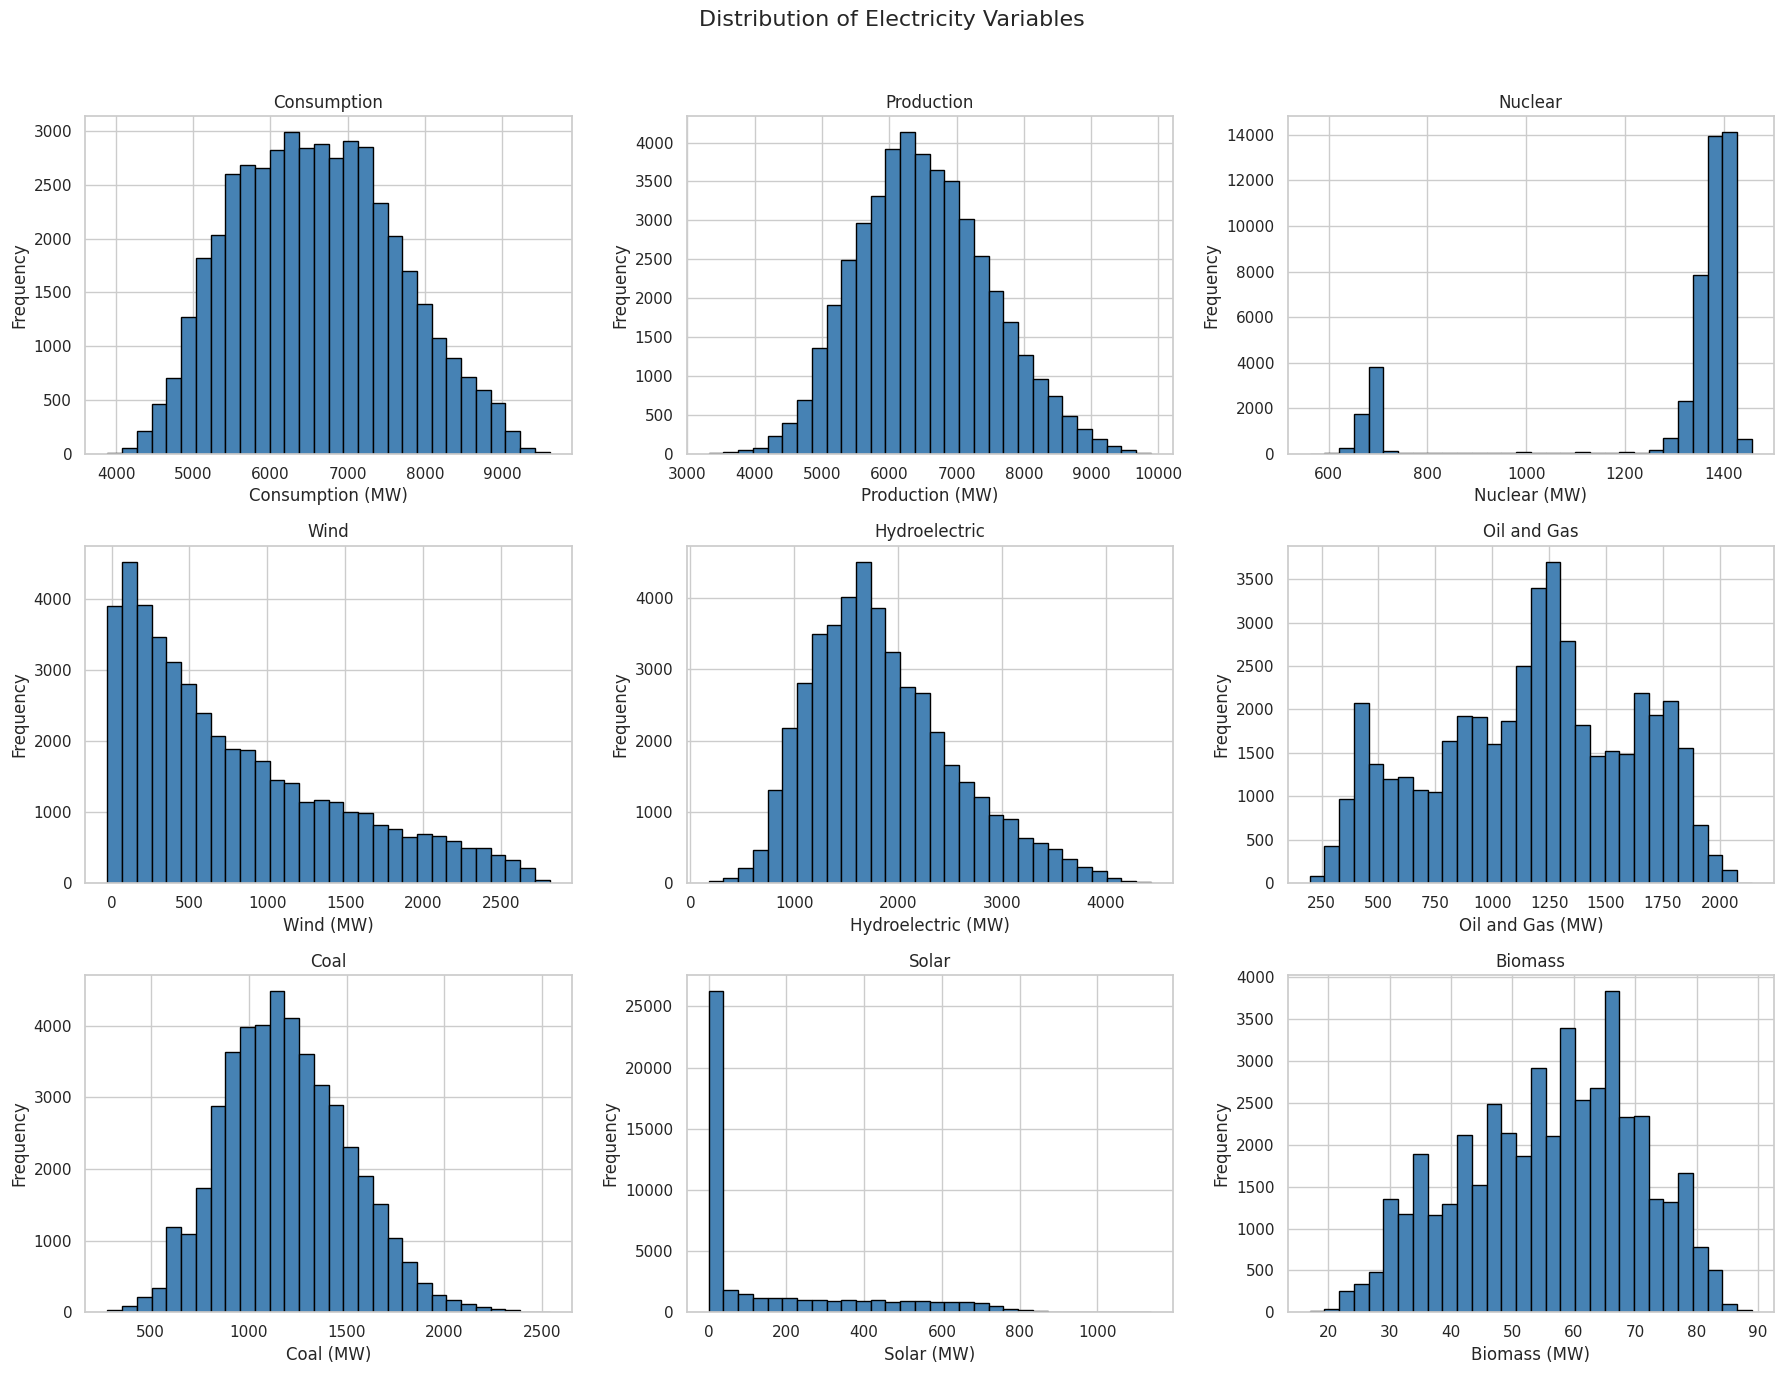

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribution of Electricity Variables', fontsize=16)

variables = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
titles = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

for i, ax in enumerate(axes.flatten()):
    if i < len(variables):
        df[variables[i]].hist(ax=ax, bins=30, color='steelblue', edgecolor='black')
        ax.set_title(titles[i])
        ax.set_xlabel(f'{titles[i]} (MW)')
        ax.set_ylabel('Frequency')
    else:
        fig.delaxes(ax)  

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

**5. Análise de Picos de Consumo**

- Identificação de Picos de Consumo
- Analisar os momentos em que o consumo de energia elétrica atinge picos e correlacioná-los com as condições de produção.

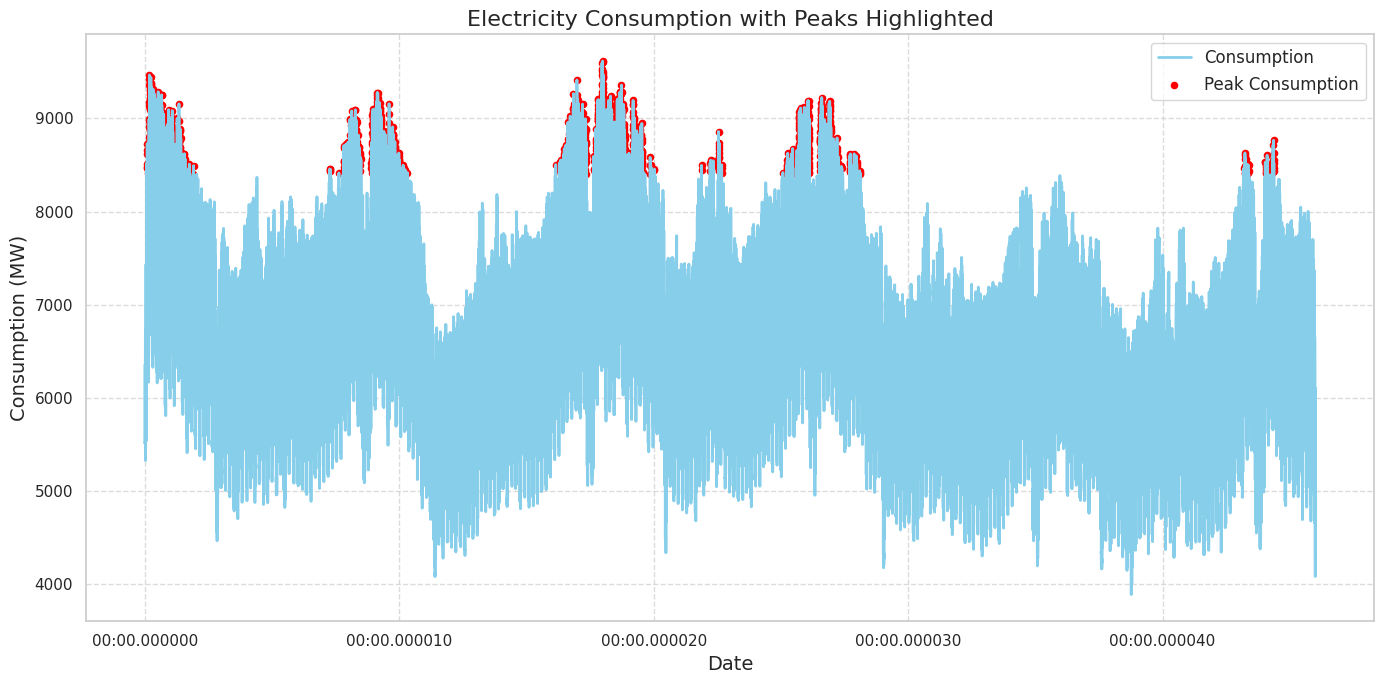

In [ ]:
df.index = pd.to_datetime(df.index)

df['peak_consumption'] = df['Consumption'] > df['Consumption'].quantile(0.95)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Consumption'], label='Consumption', color='skyblue', linewidth=2)
plt.scatter(df[df['peak_consumption']].index, df[df['peak_consumption']]['Consumption'], color='red', s=20, label='Peak Consumption')

plt.title('Electricity Consumption with Peaks Highlighted', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Consumption (MW)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

plt.show()

**6. Análise de Importação e Exportação de Eletricidade**

- Importação vs Exportação
- Analisar quando a produção excede o consumo (exportação) e quando o consumo excede a produção (importação).

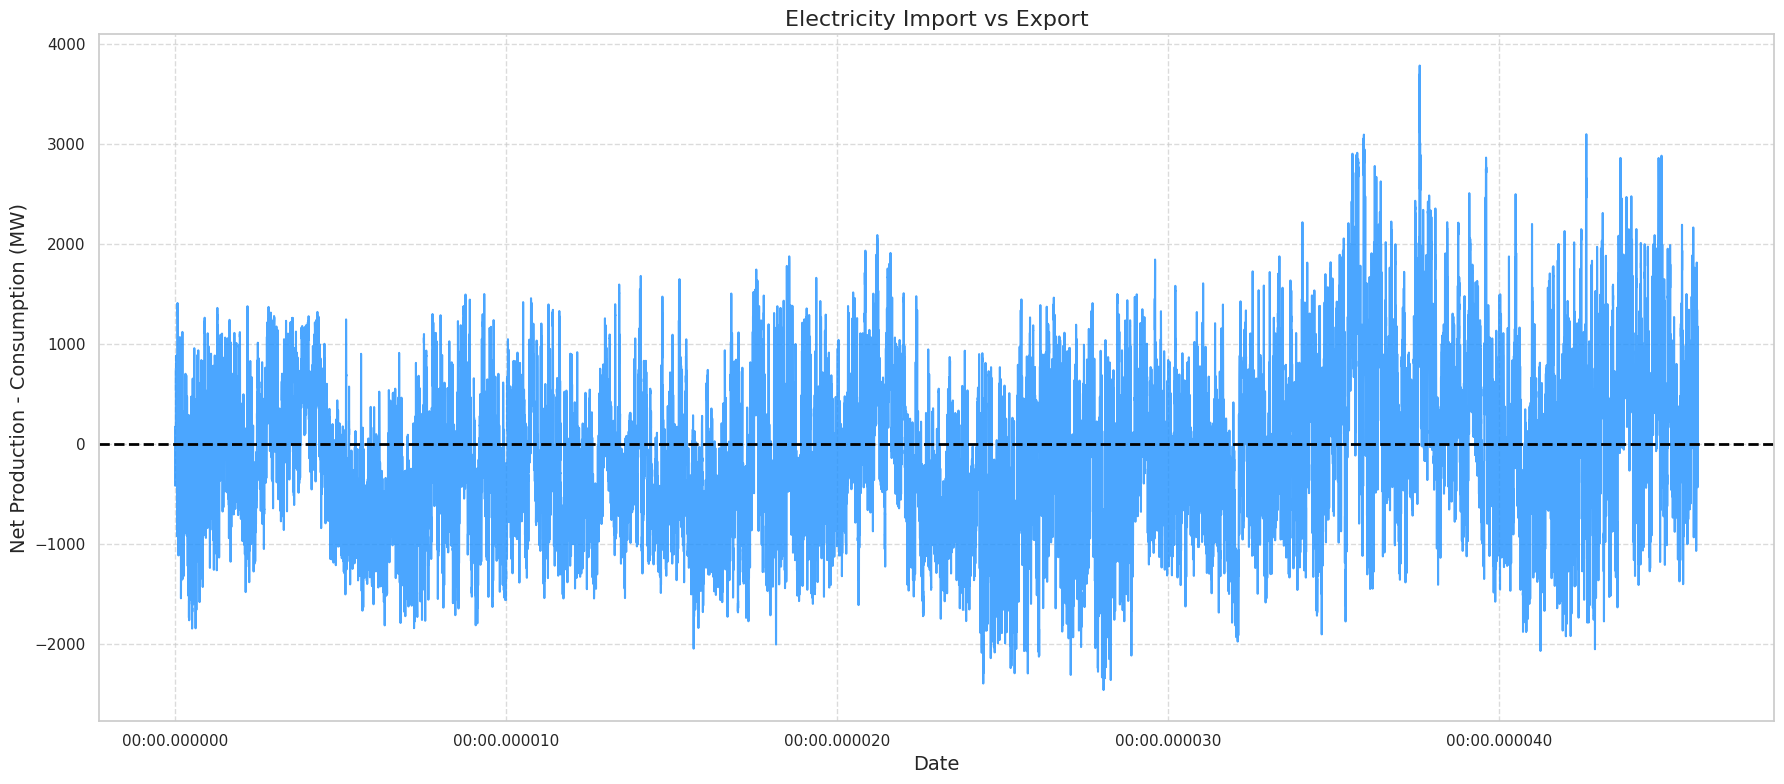

In [ ]:
df.index = pd.to_datetime(df.index)

df['import_export'] = df['Production'] - df['Consumption']

plt.figure(figsize=(18, 8))
plt.plot(df.index, df['import_export'], color='dodgerblue', linewidth=1.5, alpha=0.8)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Electricity Import vs Export', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Net Production - Consumption (MW)', fontsize=14)

plt.grid(False, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
for source in ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']:
    df[f'{source}_fraction'] = df[source] / df['Production']
    
df['consumption_production_ratio'] = df['Consumption'] / df['Production']
df['renewable_production'] = df[['Wind', 'Hydroelectric', 'Solar', 'Biomass']].sum(axis=1)
df['non_renewable_production'] = df[['Nuclear', 'Oil and Gas', 'Coal']].sum(axis=1)
df['renewable_fraction'] = df['renewable_production'] / df['Production']

df = df.rename(columns={'DateTime': 'date_time',
                        'Consumption': 'consumption',
                        'Production': 'production',
                        'Nuclear': 'nuclear',
                        'Wind': 'wind',
                        'Hydroelectric': 'hydroelectric',
                        'Oil and Gas': 'oil_and_gas',
                        'Coal': 'coal',
                        'Solar': 'solar',
                        'Biomass': 'biomass',
                        'peak_consumption': 'peak_consumption',
                        'import_export': 'import_export',
                        'Nuclear_fraction': 'nuclear_fraction',
                        'Wind_fraction': 'wind_fraction',
                        'Hydroelectric_fraction': 'hydroelectric_fraction',
                        'Oil and Gas_fraction': 'oil_and_gas_fraction',
                        'Coal_fraction': 'coal_fraction',
                        'Solar_fraction': 'solar_fraction',
                        'Biomass_fraction': 'biomass_fraction',
                        'consumption_production_ratio': 'consumption_production_ratio',
                        'renewable_production': 'renewable_production',
                        'non_renewable_production': 'non_renewable_production',
                        'renewable_fraction': 'renewable_fraction',
                        'hour': 'hour',
                        'day_of_week': 'day_of_week',
                        'quarter': 'quarter',
                        'month': 'month',
                        'year': 'year',
                        'day_of_year': 'day_of_year'})


df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46011 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000046010
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date_time                     46011 non-null  datetime64[ns]
 1   consumption                   46011 non-null  int64         
 2   production                    46011 non-null  int64         
 3   nuclear                       46011 non-null  int64         
 4   wind                          46011 non-null  int64         
 5   hydroelectric                 46011 non-null  int64         
 6   oil_and_gas                   46011 non-null  int64         
 7   coal                          46011 non-null  int64         
 8   solar                         46011 non-null  int64         
 9   biomass                       46011 non-null  int64         
 10  hour                          46011 non-null  int

# Parte 3.1 - Análise de séries temporais

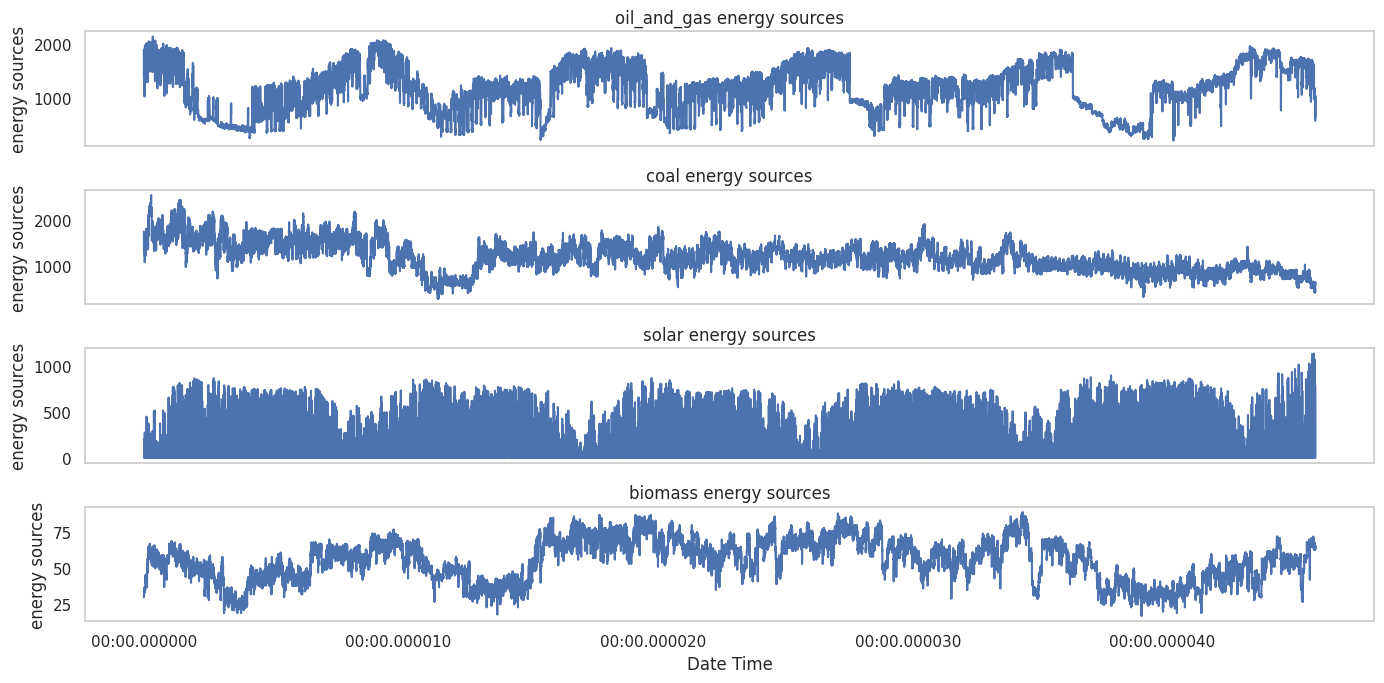

In [ ]:
energy_sources = ['oil_and_gas', 'coal', 'solar', 'biomass']

fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(14, 7), sharex=True)

for i, source in enumerate(energy_sources):
    axes[i].plot(df.index, df[source], label=source)
    axes[i].set_ylabel('energy sources')
    axes[i].set_title(f'{source} energy sources')
    axes[i].grid(False)

plt.xlabel('Date Time')
plt.tight_layout()
plt.show()

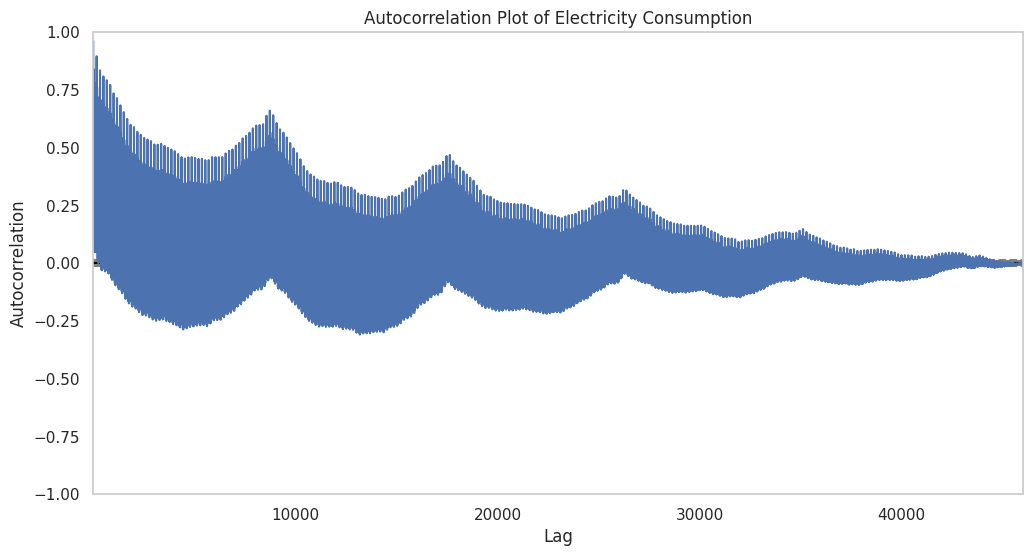

In [ ]:
from pandas.plotting import autocorrelation_plot

consumption_series = df['consumption']

plt.figure(figsize=(12, 6))

autocorrelation_plot(consumption_series)

plt.title('Autocorrelation Plot of Electricity Consumption')

plt.show()


<Figure size 1200x600 with 0 Axes>

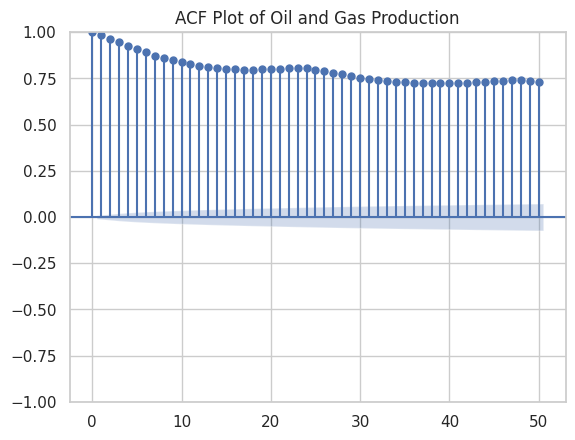

<Figure size 1200x600 with 0 Axes>

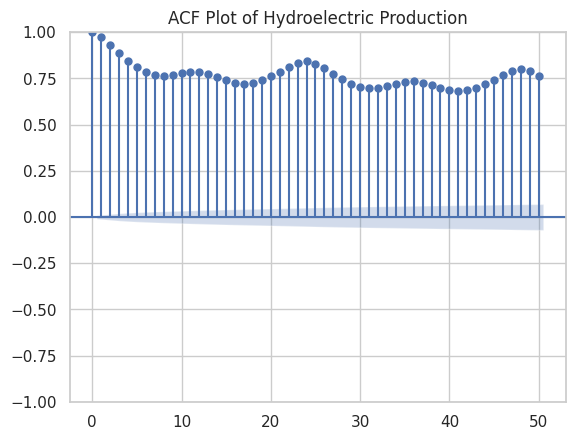

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plot_acf(df.oil_and_gas_fraction, lags=50) 

plt.title('ACF Plot of Oil and Gas Production')

plt.show()

plt.figure(figsize=(12, 6))

plot_acf(df.hydroelectric_fraction, lags=50)  

plt.title('ACF Plot of Hydroelectric Production')

plt.show()


# Parte 4 - Divisão de teste de treinamento

In [ ]:
# Defina a matriz de recursos 'X' e a variável de destino 'y' para um modelo de aprendizado de máquina

# 'X' é a matriz de recursos que inclui as seguintes colunas do DataFrame 'df':
# 'hour': A hora do dia (0-23)
# 'day_of_week': O dia da semana (0=segunda-feira, 6=domingo)
# 'quarter': O trimestre do ano (1-4)
# 'month': O mês do ano (1-12)
# 'year': O componente do ano da data

# 'day_of_year': O dia do ano (1-365/366)
X = df[['hour', 'day_of_week', 'quarter', 'month', 'year', 'day_of_year']]

# 'y' é a variável de destino que representa o consumo de eletricidade, que o modelo pretende prever.
y = df['consumption']

In [ ]:
X.shape

(46011, 6)

In [ ]:
y.shape

(46011,)

# Parte 5 - Pré-processamento

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
def create_sequences(X, y, seq_length):
    """
  Crie sequências de dados para previsão de séries temporais.

Parâmetros:
- X (np.array): A matriz de recursos, onde cada linha representa um passo de tempo diferente, e cada coluna representa um recurso diferente.
- y (np.array): A matriz de variáveis ​​de destino correspondente à matriz de recursos X.
- seq_length (int): O comprimento da sequência a ser criada. Isso define quantos passos de tempo anteriores devem ser usados ​​para prever o próximo passo de tempo.

Retorna:
- X_seq (np.array): Uma matriz 3D de forma (num_sequences, seq_length, num_features), onde cada elemento é uma sequência de valores de recursos ao longo do tempo.
- y_seq (np.array): Uma matriz 1D contendo os valores de destino que correspondem a cada sequência em X_seq.

Esta função itera sobre a matriz de recursos X e a matriz de destino y para criar sequências de comprimento `seq_length`.
Cada sequência em X_seq consiste em linhas consecutivas `seq_length` de X, e o valor correspondente em y_seq é o valor
em y que segue imediatamente cada sequência.
    """
    X_seq, y_seq = [], []
    
    
    for i in range(len(X) - seq_length):
        
        X_seq.append(X[i:i+seq_length])
        
        
        y_seq.append(y[i+seq_length])
    
    
    return np.array(X_seq), np.array(y_seq)


SEQ_LENGTH = 24  


X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH)


# Parte 6 - Treinamento de modelo

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir as sequências em conjuntos de treinamento e teste

# X_seq: A matriz 3D contendo sequências de recursos (criadas anteriormente usando a função create_sequences).
# y_seq: A matriz 1D contendo os valores de destino correspondentes a cada sequência em X_seq.

# Parâmetros:
# - test_size=0.2: Especifica que 20% dos dados devem ser alocados para o conjunto de teste e 80% para o conjunto de treinamento.
# - random_state=42: Garante a reprodutibilidade definindo uma semente para o gerador de números aleatórios.
# - shuffle=False: Impede o embaralhamento dos dados antes da divisão, o que é importante para dados de séries temporais para manter a ordem temporal.

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

# Parte 7 - Rede Neural

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense


model_rnn = Sequential()

model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model_rnn.add(Dropout(0.2))

model_rnn.add(SimpleRNN(units=50))

model_rnn.add(Dropout(0.2))

model_rnn.add(Dense(units=2)) 

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 24, 50)         │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,002 (31.26 KB)

 Trainable params: 8,002 (31.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model_rnn.fit(X_train, y_train, 
                     epochs=50, batch_size=32, 
                     validation_data=(X_test, y_test))

Epoch 1/50
  30/1150 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3605

I0000 00:00:1723748425.651388      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0858 - val_loss: 0.0167
Epoch 2/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0145 - val_loss: 0.0143
Epoch 3/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0100 - val_loss: 0.0189
Epoch 4/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0076 - val_loss: 0.0159
Epoch 5/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0067 - val_loss: 0.0123
Epoch 6/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0065 - val_loss: 0.0127
Epoch 7/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0063 - val_loss: 0.0133
Epoch 8/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0058 - val_loss: 0.0127
Epoch 9/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0059 - val_loss: 0.0111
Epoch 10/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0054 - val_loss: 0.0108
Epoch 11/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0053 - val_loss: 0.0114
Epoch 12/50
1150/1150 ━━━━━━━━━━━━━━━━━

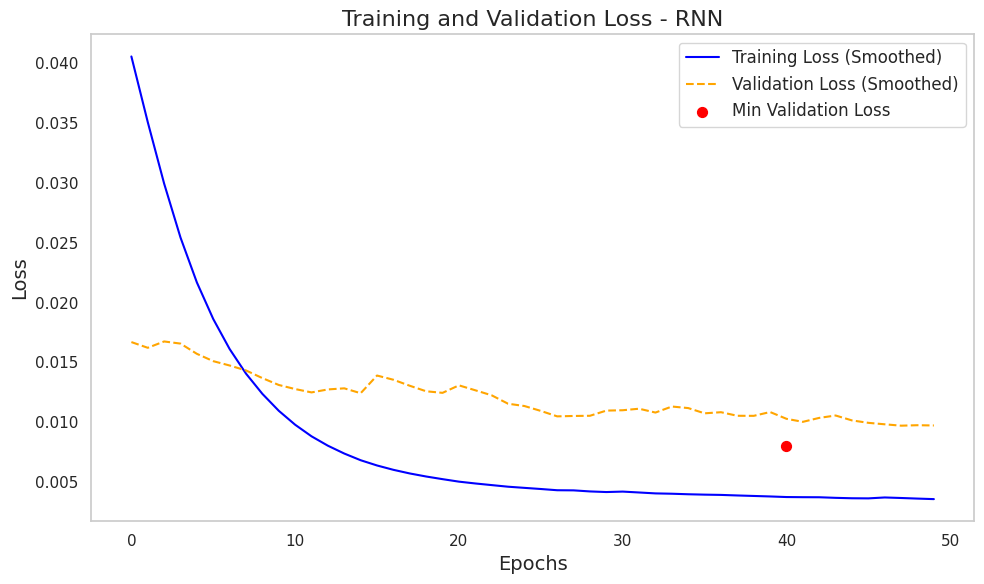

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


plt.figure(figsize=(10, 6))


smoothed_training_loss = smooth_curve(hist.history['loss'])
smoothed_validation_loss = smooth_curve(hist.history['val_loss'])


plt.plot(smoothed_training_loss, label='Training Loss (Smoothed)', color='blue', linestyle='-')
plt.plot(smoothed_validation_loss, label='Validation Loss (Smoothed)', color='orange', linestyle='--')


min_val_loss_idx = np.argmin(hist.history['val_loss'])
plt.scatter(min_val_loss_idx, hist.history['val_loss'][min_val_loss_idx], color='red', s=50, label='Min Validation Loss')

plt.grid(False)


plt.title('Training and Validation Loss - RNN', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)


plt.legend(fontsize=12)


plt.tight_layout()
plt.show()


In [ ]:

y_pred_rnn = model_rnn.predict(X_test)

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


model_lstm = Sequential()

model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units=50))

model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(units=2))  

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,702 (123.84 KB)

 Trainable params: 31,702 (123.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist_2 = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0317 - val_loss: 0.0141
Epoch 2/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0110 - val_loss: 0.0209
Epoch 3/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0086 - val_loss: 0.0139
Epoch 4/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0067 - val_loss: 0.0155
Epoch 5/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0059 - val_loss: 0.0138
Epoch 6/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0052 - val_loss: 0.0163
Epoch 7/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0047 - val_loss: 0.0161
Epoch 8/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0045 - val_loss: 0.0148
Epoch 9/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0044 - val_loss: 0.0118
Epoch 10/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0039 - val_loss: 0.0116
Epoch 11/50
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0040 - val_loss: 0.0118
Epoch 12/50
1150/1150 ━━━━━━

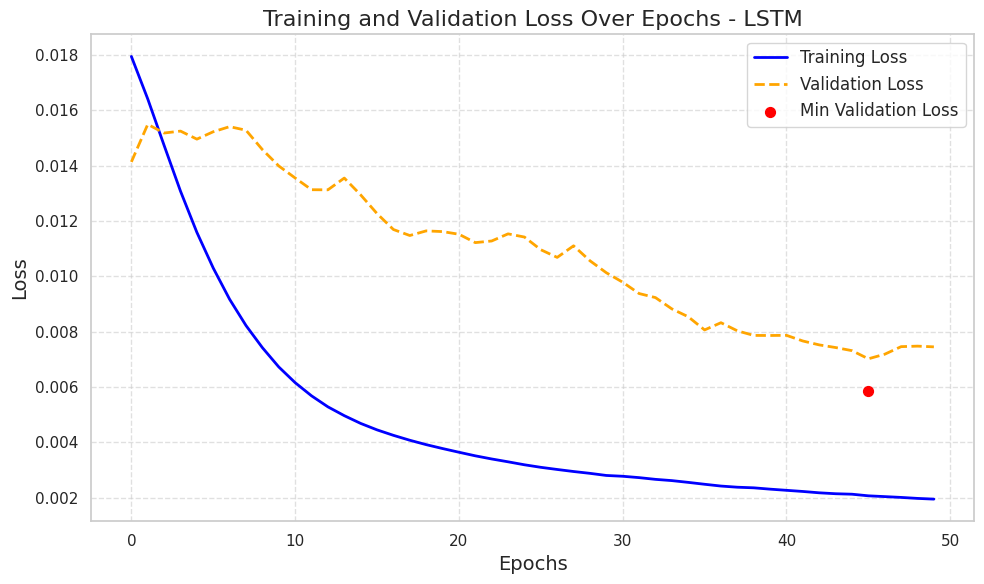

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.figure(figsize=(10, 6))

smoothed_training_loss = smooth_curve(hist_2.history['loss'])
smoothed_validation_loss = smooth_curve(hist_2.history['val_loss'])

plt.plot(smoothed_training_loss, label='Training Loss', color='blue', linestyle='-', linewidth=2)

plt.plot(smoothed_validation_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2)

min_val_loss_idx = np.argmin(hist_2.history['val_loss'])
plt.scatter(min_val_loss_idx, hist_2.history['val_loss'][min_val_loss_idx], color='red', s=50, label='Min Validation Loss')

plt.grid(True, linestyle='--', alpha=0.6)

plt.title('Training and Validation Loss Over Epochs - LSTM', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_lstm = model_lstm.predict(X_test)

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
y_test_descaled = scaler_y.inverse_transform(y_test)
y_pred_rnn_descaled = scaler_y.inverse_transform(y_pred_rnn)
y_pred_lstm_descaled = scaler_y.inverse_transform(y_pred_lstm)

# Parte 8 - Predição de Plotagem de Rede Neural

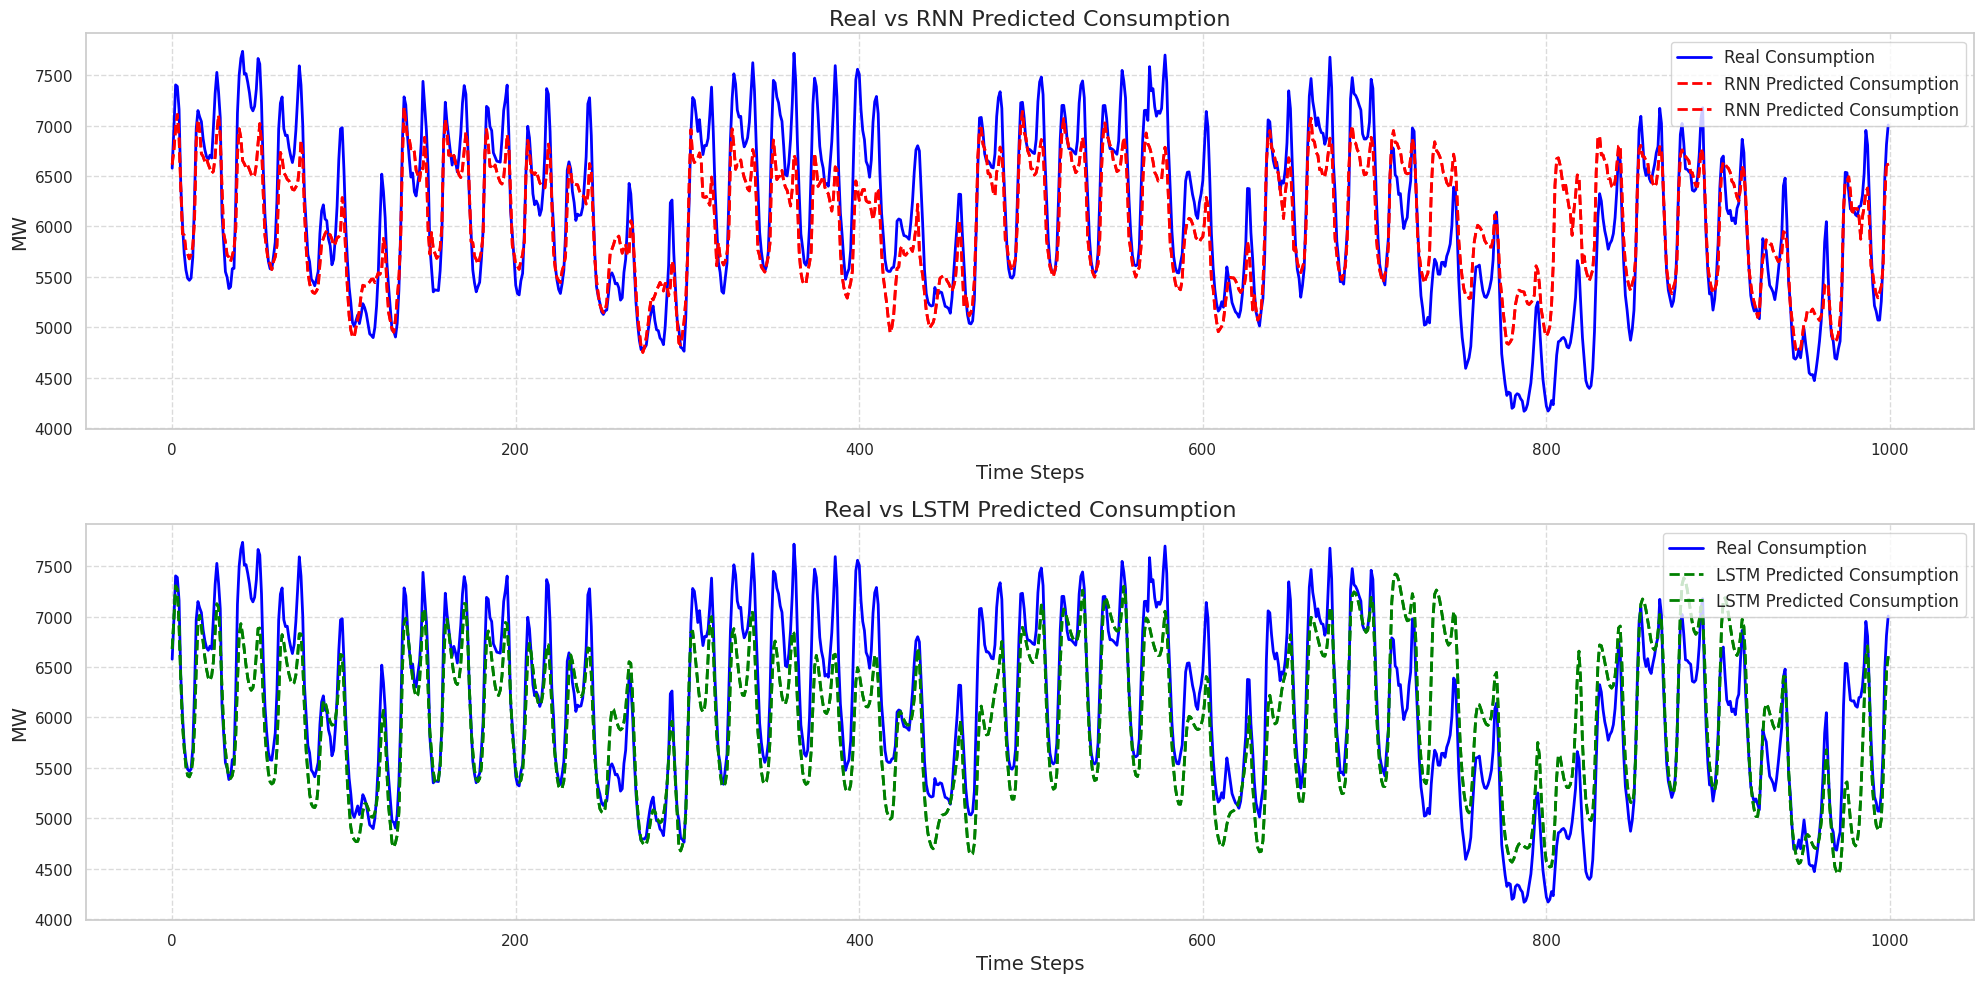

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(y_test_descaled[:1000], color='blue', label='Real Consumption', linewidth=2)
plt.plot(y_pred_rnn_descaled[:1000], color='red', linestyle='dashed', label='RNN Predicted Consumption', linewidth=2)
plt.title('Real vs RNN Predicted Consumption', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('MW', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.plot(y_test_descaled[:1000], color='blue', label='Real Consumption', linewidth=2)
plt.plot(y_pred_lstm_descaled[:1000], color='green', linestyle='dashed', label='LSTM Predicted Consumption', linewidth=2)
plt.title('Real vs LSTM Predicted Consumption', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('MW', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Parte 9 - Métricas e avaliação

In [ ]:
print(f'y_test_descaled shape: {y_test_descaled.shape}')

print(f'y_pred_rnn_descaled shape: {y_pred_rnn_descaled.shape}')

print(f'y_pred_lstm_descaled shape: {y_pred_lstm_descaled.shape}')

y_test_descaled shape: (9198, 1)
y_pred_rnn_descaled shape: (9198, 2)
y_pred_lstm_descaled shape: (9198, 2)


In [ ]:
y_pred_lstm = model_lstm.predict(X_test)

y_pred_lstm_descaled = scaler_y.inverse_transform(y_pred_lstm)

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn_descaled = scaler_y.inverse_transform(y_pred_rnn)

y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_descaled = scaler_y.inverse_transform(y_pred_lstm)

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_rnn_descaled = y_pred_rnn_descaled[:, 0]
y_pred_lstm_descaled = y_pred_lstm_descaled[:, 0]

mae_rnn = mean_absolute_error(y_test_descaled, y_pred_rnn_descaled)
mse_rnn = mean_squared_error(y_test_descaled, y_pred_rnn_descaled)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test_descaled, y_pred_rnn_descaled)

mae_lstm = mean_absolute_error(y_test_descaled, y_pred_lstm_descaled)
mse_lstm = mean_squared_error(y_test_descaled, y_pred_lstm_descaled)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_descaled, y_pred_lstm_descaled)

print(f'RNN Model Evaluation:')
print(f'MAE: {mae_rnn:.2f}')
print(f'MSE: {mse_rnn:.2f}')
print(f'RMSE: {rmse_rnn:.2f}')
print(f'R²: {r2_rnn:.2f}')

print(f'\nLSTM Model Evaluation:')
print(f'MAE: {mae_lstm:.2f}')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'R²: {r2_lstm:.2f}')

RNN Model Evaluation:
MAE: 435.28
MSE: 316220.20
RMSE: 562.33
R²: 0.64

LSTM Model Evaluation:
MAE: 387.77
MSE: 240968.12
RMSE: 490.89
R²: 0.72


# Parte 10 - Modelo de aprendizado de máquina Regressão - XGBoost LightGBM

---

### **Parte 2: Implementando modelos de regressão com XGBoost e LightGBM**

Após avaliar com sucesso o desempenho de redes neurais recorrentes (RNNs) e redes de memória de longo prazo (LSTMs) para previsão de séries temporais, expandimos nossa análise incorporando modelos avançados de regressão de aprendizado de máquina. O objetivo desta segunda fase é alavancar o poder das técnicas de aumento de gradiente para aumentar a precisão preditiva e fornecer resultados robustos.

#### **2.1. Introdução ao aumento de gradiente**

O aumento de gradiente é uma técnica de aprendizado de máquina que constrói modelos sequencialmente, cada novo modelo tentando corrigir os erros cometidos pelos anteriores. Entre as implementações mais poderosas desta técnica estão XGBoost e LightGBM, ambos otimizados para eficiência e precisão, particularmente no manuseio de dados em larga escala e padrões complexos.

- **XGBoost (Extreme Gradient Boosting)**: Uma implementação de aumento de gradiente que é altamente eficiente e escalável. O XGBoost inclui recursos para regularização, o que ajuda a evitar overfitting, e suporta processamento paralelo, o que acelera o treinamento.

- **LightGBM (Light Gradient Boosting Machine)**: Uma estrutura de reforço de gradiente que usa algoritmos de aprendizado baseados em árvore. O LightGBM foi projetado para ser distribuído e eficiente, com velocidade de treinamento mais rápida, menor uso de memória e melhor precisão em comparação a muitos outros algoritmos.

---

## Modelo de Regressão 1 - XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv")
data

DateTime  Consumption  Production  Nuclear  Wind  \
0      2019-01-01 00:00:00         6352        6527     1395    79   
1      2019-01-01 01:00:00         6116        5701     1393    96   
2      2019-01-01 02:00:00         5873        5676     1393   142   
3      2019-01-01 03:00:00         5682        5603     1397   191   
4      2019-01-01 04:00:00         5557        5454     1393   159   
...                    ...          ...         ...      ...   ...   
46006  2024-03-31 19:00:00         5618        5902     1398   505   
46007  2024-03-31 20:00:00         6107        6205     1395   671   
46008  2024-03-31 21:00:00         5991        5855     1395   868   
46009  2024-03-31 22:00:00         5527        5726     1393   908   
46010  2024-03-31 23:00:00         5111        5551     1391  1011   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  
0               1383         1896  1744      0       30  
1               1112         1429  1641      0       30  
2               1030         1465  1616      0       30  
3                972         1455  1558      0       30  
4                960         1454  1458      0       30  
...              ...          ...   ...    ...      ...  
46006           2294         1012   620      6       65  
46007           2389         1037   645      0       66  
46008           2201          705   621      0       66  
46009           2088          648   622      0       66  
46010           1845          633   607      0       66  

[46011 rows x 10 columns]

In [ ]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

data['hour'] = data['DateTime'].dt.hour

data['day_of_week'] = data['DateTime'].dt.dayofweek

data['quarter'] = data['DateTime'].dt.quarter

data['month'] = data['DateTime'].dt.month

data['year'] = data['DateTime'].dt.year

data['day_of_year'] = data['DateTime'].dt.dayofyear

In [ ]:
X = data[['hour', 'day_of_week', 'quarter', 'month', 'year', 'day_of_year']]

y = data['Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

xgboost_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 1000,  
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'tree_method': 'hist',
    'device': 'cuda'
}


xgboost_model = xgb.XGBRegressor(**xgboost_params)


eval_set = [(X_train, y_train), (X_val, y_val)]


xgboost_model.fit(X_train, y_train, 
                  eval_metric='rmse', 
                  eval_set=eval_set, 
                  verbose=True, 
                  early_stopping_rounds=1000)


evals_result = xgboost_model.evals_result()

[0]	validation_0-rmse:1002.71921	validation_1-rmse:1013.24282
[1]	validation_0-rmse:931.70677	validation_1-rmse:941.52444
[2]	validation_0-rmse:864.43182	validation_1-rmse:872.86995
[3]	validation_0-rmse:839.18258	validation_1-rmse:847.86815
[4]	validation_0-rmse:782.15195	validation_1-rmse:789.64562
[5]	validation_0-rmse:733.41035	validation_1-rmse:740.05084
[6]	validation_0-rmse:689.74104	validation_1-rmse:695.67900
[7]	validation_0-rmse:651.96490	validation_1-rmse:657.19941
[8]	validation_0-rmse:618.31103	validation_1-rmse:623.52269
[9]	validation_0-rmse:601.99665	validation_1-rmse:607.05611
[10]	validation_0-rmse:572.02595	validation_1-rmse:576.73405
[11]	validation_0-rmse:545.91339	validation_1-rmse:550.14106
[12]	validation_0-rmse:523.86818	validation_1-rmse:527.50104
[13]	validation_0-rmse:505.02425	validation_1-rmse:508.23987
[14]	validation_0-rmse:488.03184	validation_1-rmse:490.85368
[15]	validation_0-rmse:473.65191	validation_1-rmse:476.02093
[16]	validation_0-rmse:457.82780

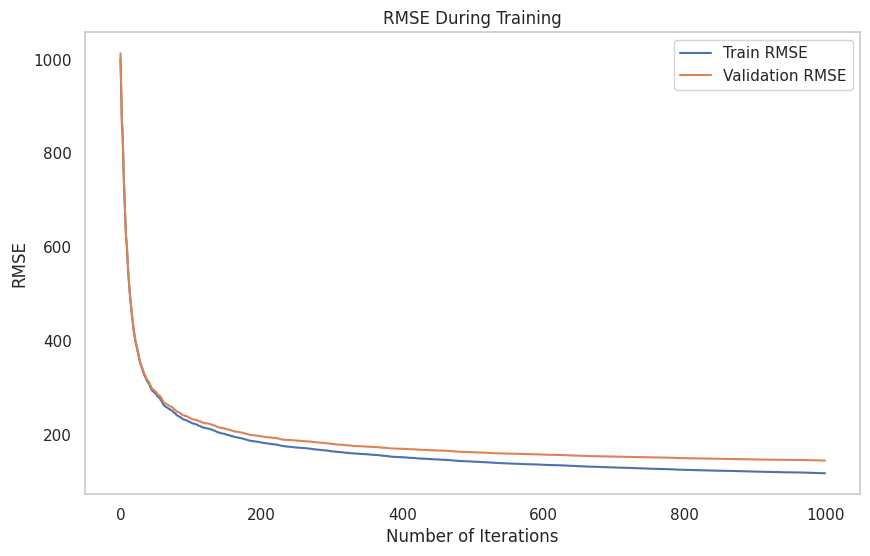

In [ ]:
train_rmse = evals_result['validation_0']['rmse']
val_rmse = evals_result['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.title('RMSE During Training')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
future_dates = pd.date_range(start=data['DateTime'].max(), periods=250, freq='D')

In [ ]:
future_df = pd.DataFrame({'DateTime': future_dates})

future_df['hour'] = future_df['DateTime'].dt.hour
future_df['day_of_week'] = future_df['DateTime'].dt.dayofweek
future_df['quarter'] = future_df['DateTime'].dt.quarter
future_df['month'] = future_df['DateTime'].dt.month
future_df['year'] = future_df['DateTime'].dt.year
future_df['day_of_year'] = future_df['DateTime'].dt.dayofyear

X_future = future_df[['hour', 'day_of_week', 'quarter', 'month', 'year', 'day_of_year']]

future_predictions = xgboost_model.predict(X_future)

In [ ]:
y_future_pred = xgboost_model.predict(X_future)

future_df['Predicted_Consumption_xgboost'] = y_future_pred

In [ ]:
future_df.to_csv("pred_model1.csv")

future_df

DateTime  hour  day_of_week  quarter  month  year  day_of_year  \
0   2024-03-31 23:00:00    23            6        1      3  2024           91   
1   2024-04-01 23:00:00    23            0        2      4  2024           92   
2   2024-04-02 23:00:00    23            1        2      4  2024           93   
3   2024-04-03 23:00:00    23            2        2      4  2024           94   
4   2024-04-04 23:00:00    23            3        2      4  2024           95   
..                  ...   ...          ...      ...    ...   ...          ...   
245 2024-12-01 23:00:00    23            6        4     12  2024          336   
246 2024-12-02 23:00:00    23            0        4     12  2024          337   
247 2024-12-03 23:00:00    23            1        4     12  2024          338   
248 2024-12-04 23:00:00    23            2        4     12  2024          339   
249 2024-12-05 23:00:00    23            3        4     12  2024          340   

     Predicted_Consumption_xgboost  
0                      5171.054199  
1                      6223.642090  
2                      6193.552246  
3                      6224.072266  
4                      6156.023438  
..                             ...  
245                    5728.682617  
246                    6276.154297  
247                    6577.569336  
248                    6520.327637  
249                    6621.551758  

[250 rows x 8 columns]

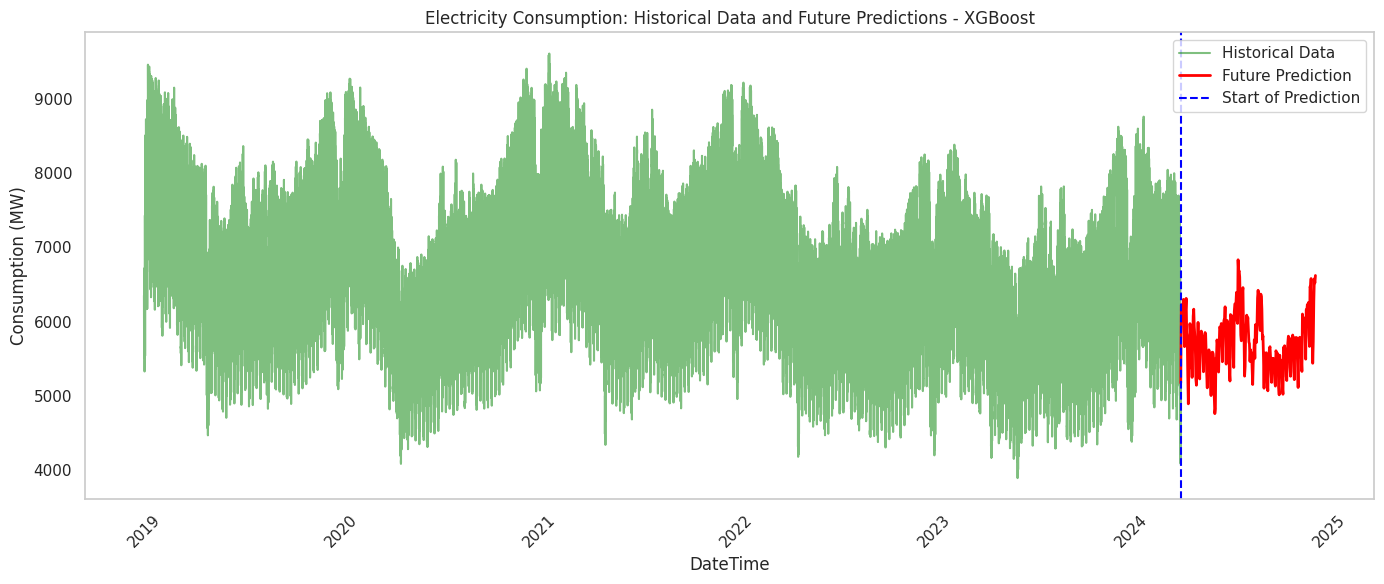

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(data['DateTime'], data['Consumption'], 
         label='Historical Data', 
         color='green', 
         alpha=0.5, 
         linewidth=1.5)

plt.plot(future_df['DateTime'], future_df['Predicted_Consumption_xgboost'], 
         label='Future Prediction', 
         color='red', 
         linewidth=2)

plt.axvline(x=data['DateTime'].max(), color='blue', linestyle='--', label='Start of Prediction')

plt.title('Electricity Consumption: Historical Data and Future Predictions - XGBoost')
plt.xlabel('DateTime')
plt.ylabel('Consumption (MW)')
plt.legend()
plt.grid(False)

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

## Modelo de Regressão 2 - LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36808, 6)
y_train shape: (36808,)
X_test shape: (9203, 6)
y_test shape: (9203,)


In [ ]:
import lightgbm as lgb 

train_data = lgb.Dataset(X_train, label=y_train) 
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse', 'mape'],
    'device': 'gpu',  # ou 'cpu'
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'bin_construct_sample_cnt': 50000
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

model_LightGBM = lgb.train(params,
                           train_data,
                           valid_sets=[test_data],
                           num_boost_round=500)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 36808, number of used features: 6
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.28 MB) transferred to GPU in 0.000895 secs. 0 sparse feature groups
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 6588.290616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
future_dates2 = pd.date_range(start=data['DateTime'].max(), periods=450, freq='D')

In [ ]:
future_df2 = pd.DataFrame({'DateTime': future_dates2})

future_df2['hour'] = future_df2['DateTime'].dt.hour
future_df2['day_of_week'] = future_df2['DateTime'].dt.dayofweek
future_df2['quarter'] = future_df2['DateTime'].dt.quarter
future_df2['month'] = future_df2['DateTime'].dt.month
future_df2['year'] = future_df2['DateTime'].dt.year
future_df2['day_of_year'] = future_df2['DateTime'].dt.dayofyear

X_future2 = future_df2[['hour', 'day_of_week', 'quarter', 'month', 'year', 'day_of_year']]

In [ ]:
y_future_pred2 = model_LightGBM.predict(X_future2)

In [ ]:
future_df2['Predicted_Consumption_LightGBM'] = y_future_pred2

future_df2.to_csv("pred_model.csv")

future_df2

DateTime  hour  day_of_week  quarter  month  year  day_of_year  \
0   2024-03-31 23:00:00    23            6        1      3  2024           91   
1   2024-04-01 23:00:00    23            0        2      4  2024           92   
2   2024-04-02 23:00:00    23            1        2      4  2024           93   
3   2024-04-03 23:00:00    23            2        2      4  2024           94   
4   2024-04-04 23:00:00    23            3        2      4  2024           95   
..                  ...   ...          ...      ...    ...   ...          ...   
445 2025-06-19 23:00:00    23            3        2      6  2025          170   
446 2025-06-20 23:00:00    23            4        2      6  2025          171   
447 2025-06-21 23:00:00    23            5        2      6  2025          172   
448 2025-06-22 23:00:00    23            6        2      6  2025          173   
449 2025-06-23 23:00:00    23            0        2      6  2025          174   

     Predicted_Consumption_LightGBM  
0                       5375.534706  
1                       6099.575907  
2                       6118.964106  
3                       6118.964106  
4                       6118.964106  
..                              ...  
445                     5967.029507  
446                     5963.391849  
447                     5658.487726  
448                     5376.883386  
449                     5909.528925  

[450 rows x 8 columns]

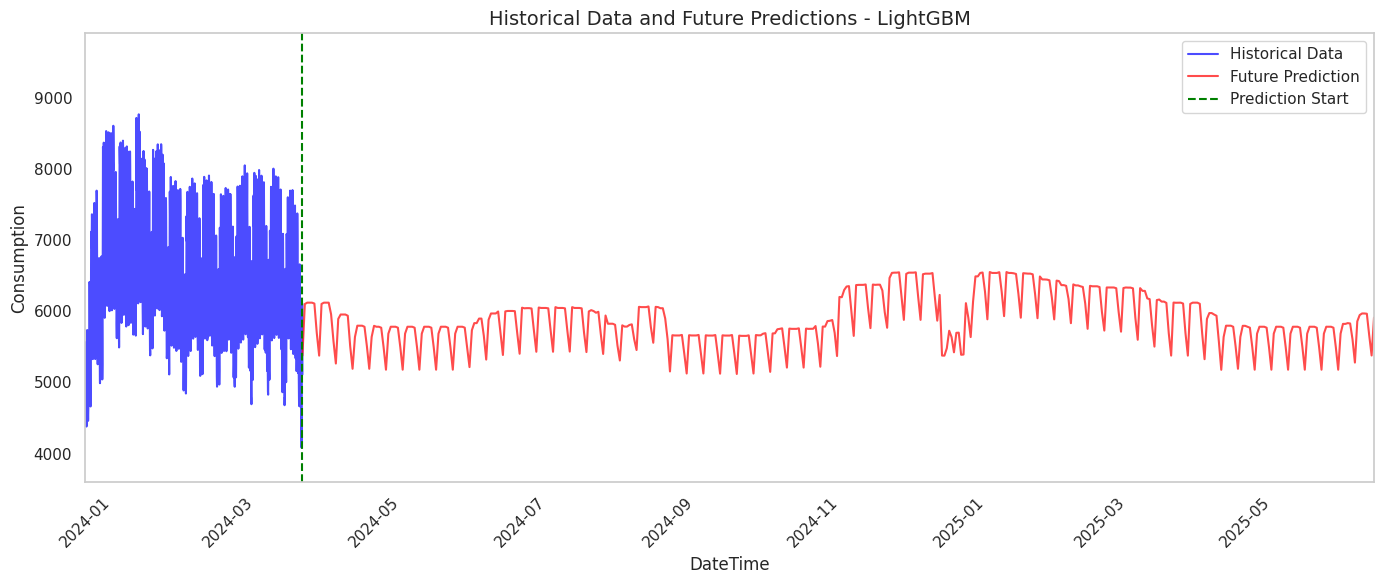

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.lineplot(x=data['DateTime'], y=data['Consumption'],
             label='Historical Data', color='blue', alpha=0.7)

sns.lineplot(x=future_df2['DateTime'], y=future_df2['Predicted_Consumption_LightGBM'],
             label='Future Prediction', color='red', alpha=0.7)

plt.axvline(x=future_df2['DateTime'].min(), color='green', linestyle='--', label='Prediction Start')

plt.xlim([pd.Timestamp('2024-01-01'), future_df2['DateTime'].max()])

plt.xticks(rotation=45)

plt.title('Historical Data and Future Predictions - LightGBM', fontsize=14)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.legend()
plt.grid(False)  
plt.tight_layout()  

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model_LightGBM.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) - LightGBM: {mse}")
print(f"R-squared (R2) - LightGBM: {r2}")

Mean Squared Error (MSE) - LightGBM: 102157.49564022737
R-squared (R2) - LightGBM: 0.907767625428375


# Parte 11 - Resultado Final

In [ ]:
# R² metricas
r2_rnn = r2_score(y_test_descaled, y_pred_rnn_descaled)
r2_lstm = r2_score(y_test_descaled, y_pred_lstm_descaled)

# para XGBoost
y_pred_xgb = xgboost_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

# para LightGBM
y_pred_lgbm = model_LightGBM.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# DataFrame
results_df = pd.DataFrame({'Model': ['RNN', 'LSTM', 
                                     'XGBoost_Regressor', 
                                     'LightGBM_Regressor'],
                           'R-squared (R2)': [r2_rnn, r2_lstm, 
                                              r2_xgb, r2_lgbm]})


results_df

Model  R-squared (R2)
0                 RNN        0.638956
1                LSTM        0.724875
2   XGBoost_Regressor        0.980732
3  LightGBM_Regressor        0.907768